In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Maharashtra_Bank_stock_data.csv")

In [2]:
df.head(5)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,30-Dec-2022,EQ,30.80,31.45,30.40,29.8,30.70,30.6,30.87,36.25,15.0,"3,21,66,015","99,29,84,452.80","29,369"
1,29-Dec-2022,EQ,29.80,30.50,29.50,30.0,29.95,29.8,29.97,36.25,15.0,"3,62,08,756","1,08,52,63,186.45","32,702"
2,28-Dec-2022,EQ,31.25,31.60,29.55,31.2,29.95,30.0,30.74,36.25,15.0,"6,96,08,835","2,13,99,33,691.95","58,701"
3,27-Dec-2022,EQ,30.45,31.55,29.50,29.4,31.40,31.2,30.59,36.25,15.0,"8,30,86,560","2,54,15,70,900.85","76,120"
4,26-Dec-2022,EQ,26.10,30.00,25.50,26.1,30.00,29.4,28.20,36.25,15.0,"12,69,51,806","3,57,95,42,908.90","87,532"


In [3]:
df.columns=df.columns.str.capitalize()

In [4]:
df.columns=df.columns.str.strip(" ")

In [5]:
df.columns=df.columns.str.replace(" ","_")

In [6]:
df.columns

Index(['Date', 'Series', 'Open', 'High', 'Low', 'Prev._close', 'Ltp', 'Close',
       'Vwap', '52w_h', '52w_l', 'Volume', 'Value', 'No_of_trades'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

df['DayOfWeek'] = df['Date'].apply(lambda x: pd.to_datetime(x).dayofweek)
df['Month'] = df['Date'].apply(lambda x: pd.to_datetime(x).month)
df['Day'] = df['Date'].apply(lambda x: pd.to_datetime(x).day)
df['Year'] = df['Date'].apply(lambda x: pd.to_datetime(x).year)

In [8]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)
df['Value'] = df['Value'].str.replace(',', '').astype(float)
df['No_of_trades'] = df['No_of_trades'].str.replace(',', '').astype(float)

In [9]:
df['Months'] = df['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df['Days'] = df['DayOfWeek'].map({0: 'Mon', 1: 'Tue', 2: 'Wed',3:'Thu',4:'Fri'})

In [10]:
df.dtypes

Date            datetime64[ns]
Series                  object
Open                   float64
High                   float64
Low                    float64
Prev._close            float64
Ltp                    float64
Close                  float64
Vwap                   float64
52w_h                  float64
52w_l                  float64
Volume                   int32
Value                  float64
No_of_trades           float64
DayOfWeek                int64
Month                    int64
Day                      int64
Year                     int64
Months                  object
Days                    object
dtype: object

In [11]:
df.describe()

,Open,High,Low,Prev._close,Ltp,Close,Vwap,52w_h,52w_l,Volume,Value,No_of_trades,DayOfWeek,Month,Day,Year
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,7.430000e+02,7.430000e+02,743.000000,743.000000,743.000000,743.000000,743.000000
mean,38.271144,38.988641,37.527416,38.143876,38.219462,38.188277,38.269233,46.808681,21.239435,2.384897e+07,1.054659e+09,32208.528937,2.021534,6.520861,15.707941,2023.001346
std,17.767524,18.065382,17.419691,17.717907,17.724693,17.711706,17.747537,18.553146,8.779768,3.030387e+07,1.446115e+09,32533.605321,1.432984,3.451518,8.776932,0.818419
min,15.200000,15.500000,15.000000,15.150000,15.250000,15.150000,15.250000,22.200000,13.200000,6.911960e+05,1.125731e+07,1775.000000,0.000000,1.000000,1.000000,2022.000000
25%,20.425000,20.825000,20.150000,20.325000,20.400000,20.350000,20.520000,32.000000,15.000000,5.505742e+06,1.499734e+08,8049.000000,1.000000,4.000000,8.000000,2022.000000
50%,32.200000,32.800000,31.350000,32.000000,32.000000,32.000000,32.040000,36.250000,16.800000,1.335270e+07,5.760314e+08,24427.000000,2.000000,7.000000,16.000000,2023.000000
75%,55.645000,56.425000,54.200000,55.320000,55.465000,55.320000,55.480000,69.450000,24.700000,2.948110e+07,1.313182e+09,43372.000000,3.000000,9.000000,23.000000,2024.000000
max,73.000000,73.500000,70.350000,72.500000,72.550000,72.500000,72.150000,73.500000,45.100000,2.982430e+08,1.449629e+10,256604.000000,6.000000,12.000000,31.000000,2024.000000


In [12]:
df.isnull().sum()

Date            0
Series          0
Open            0
High            0
Low             0
Prev._close     0
Ltp             0
Close           0
Vwap            0
52w_h           0
52w_l           0
Volume          0
Value           0
No_of_trades    0
DayOfWeek       0
Month           0
Day             0
Year            0
Months          0
Days            4
dtype: int64

In [13]:
# deleting the null values
df.dropna()

,Date,Series,Open,High,Low,Prev._close,Ltp,Close,Vwap,52w_h,52w_l,Volume,Value,No_of_trades,DayOfWeek,Month,Day,Year,Months,Days
0,2022-12-30,EQ,30.80,31.45,30.40,29.80,30.70,30.60,30.87,36.25,15.0,32166015,9.929845e+08,29369.0,4,12,30,2022,Dec,Fri
1,2022-12-29,EQ,29.80,30.50,29.50,30.00,29.95,29.80,29.97,36.25,15.0,36208756,1.085263e+09,32702.0,3,12,29,2022,Dec,Thu
2,2022-12-28,EQ,31.25,31.60,29.55,31.20,29.95,30.00,30.74,36.25,15.0,69608835,2.139934e+09,58701.0,2,12,28,2022,Dec,Wed
3,2022-12-27,EQ,30.45,31.55,29.50,29.40,31.40,31.20,30.59,36.25,15.0,83086560,2.541571e+09,76120.0,1,12,27,2022,Dec,Tue
4,2022-12-26,EQ,26.10,30.00,25.50,26.10,30.00,29.40,28.20,36.25,15.0,126951806,3.579543e+09,87532.0,0,12,26,2022,Dec,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2024-01-05,EQ,47.30,47.60,46.30,47.20,46.70,46.70,46.93,51.90,22.8,18698418,8.775018e+08,28363.0,4,1,5,2024,Jan,Fri
739,2024-01-04,EQ,47.55,47.75,46.95,47.30,47.20,47.20,47.27,51.90,22.8,27700055,1.309280e+09,31632.0,3,1,4,2024,Jan,Thu
740,2024-01-03,EQ,46.00,47.60,45.60,45.45,47.20,47.30,46.96,51.90,22.8,63018012,2.959331e+09,62773.0,2,1,3,2024,Jan,Wed
741,2024-01-02,EQ,45.50,46.20,45.10,45.65,45.45,45.45,45.58,51.90,22.8,17628818,8.034975e+08,23195.0,1,1,2,2024,Jan,Tue


In [15]:

#average value
df["Value"].mean()

1054659014.1825842

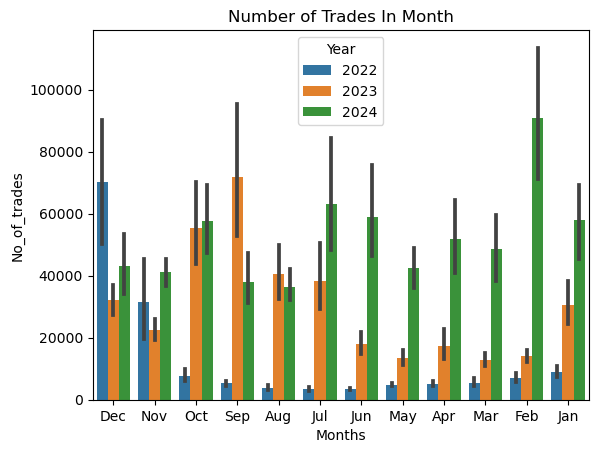

In [63]:
sns.barplot(x=df['Months'],y=df['No_of_trades'],hue=df['Year'])
plt.title("Number of Trades In Month")
plt.show()

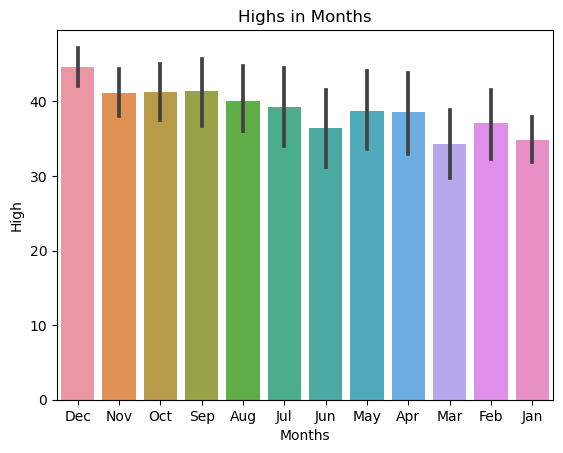

In [66]:
sns.barplot(x=df["Months"],y=df["High"])
plt.title("Highs in Months")
plt.show()

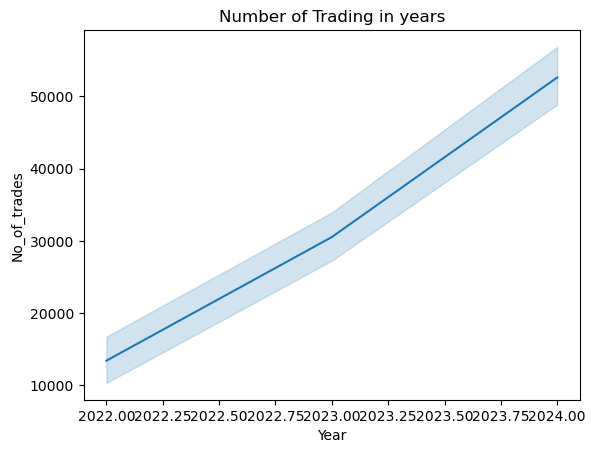

In [33]:
sns.lineplot(x=df["Year"],y=df["No_of_trades"])
plt.title("Number of Trading in years")
plt.show()

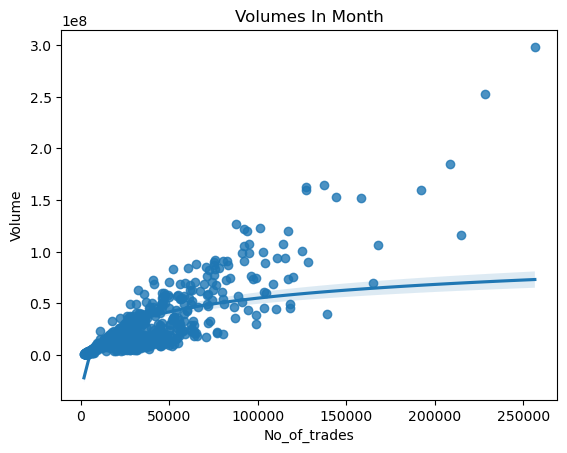

In [45]:
sns.regplot(x=df['No_of_trades'],y=df['Volume'],logx=True)
plt.title("Volumes In Month")
plt.show()

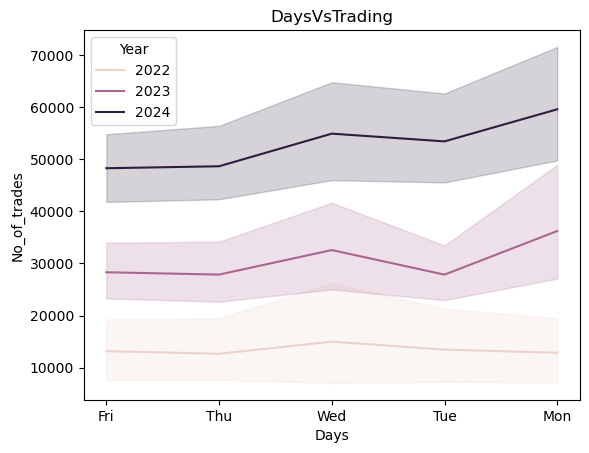

In [19]:
sns.lineplot(x=df["Days"],y=df["No_of_trades"],hue=df["Year"])
plt.title("DaysVsTrading")
plt.show()

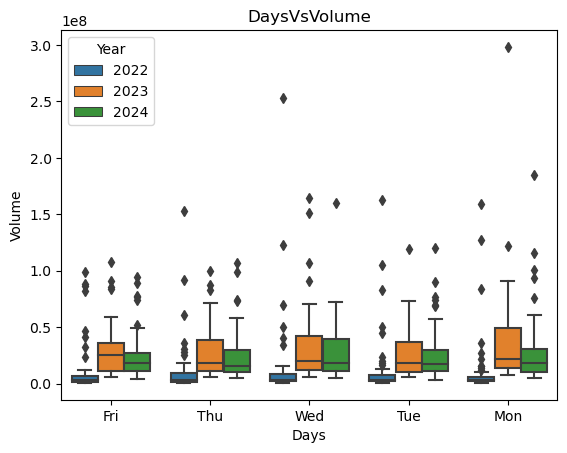

In [20]:
sns.boxplot(x=df["Days"],y=df["Volume"],hue=df["Year"])
plt.title("DaysVsVolume")
plt.show()

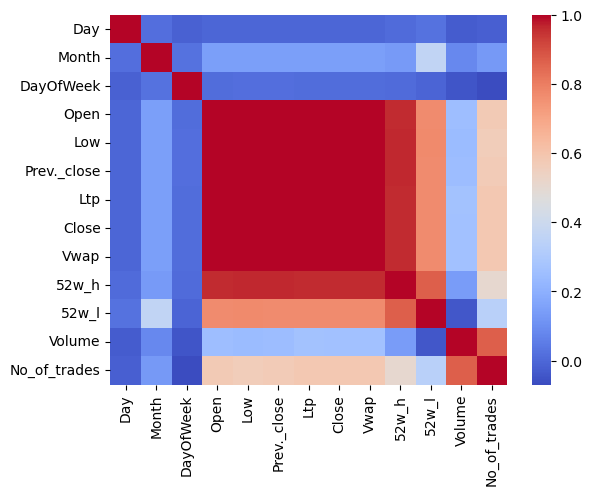

In [22]:
Corre=df[['Day','Month','DayOfWeek','Open','Low','Prev._close','Ltp','Close','Vwap','52w_h','52w_l','Volume','No_of_trades']]
sns.heatmap(Corre.corr(),cmap="coolwarm")
plt.show()

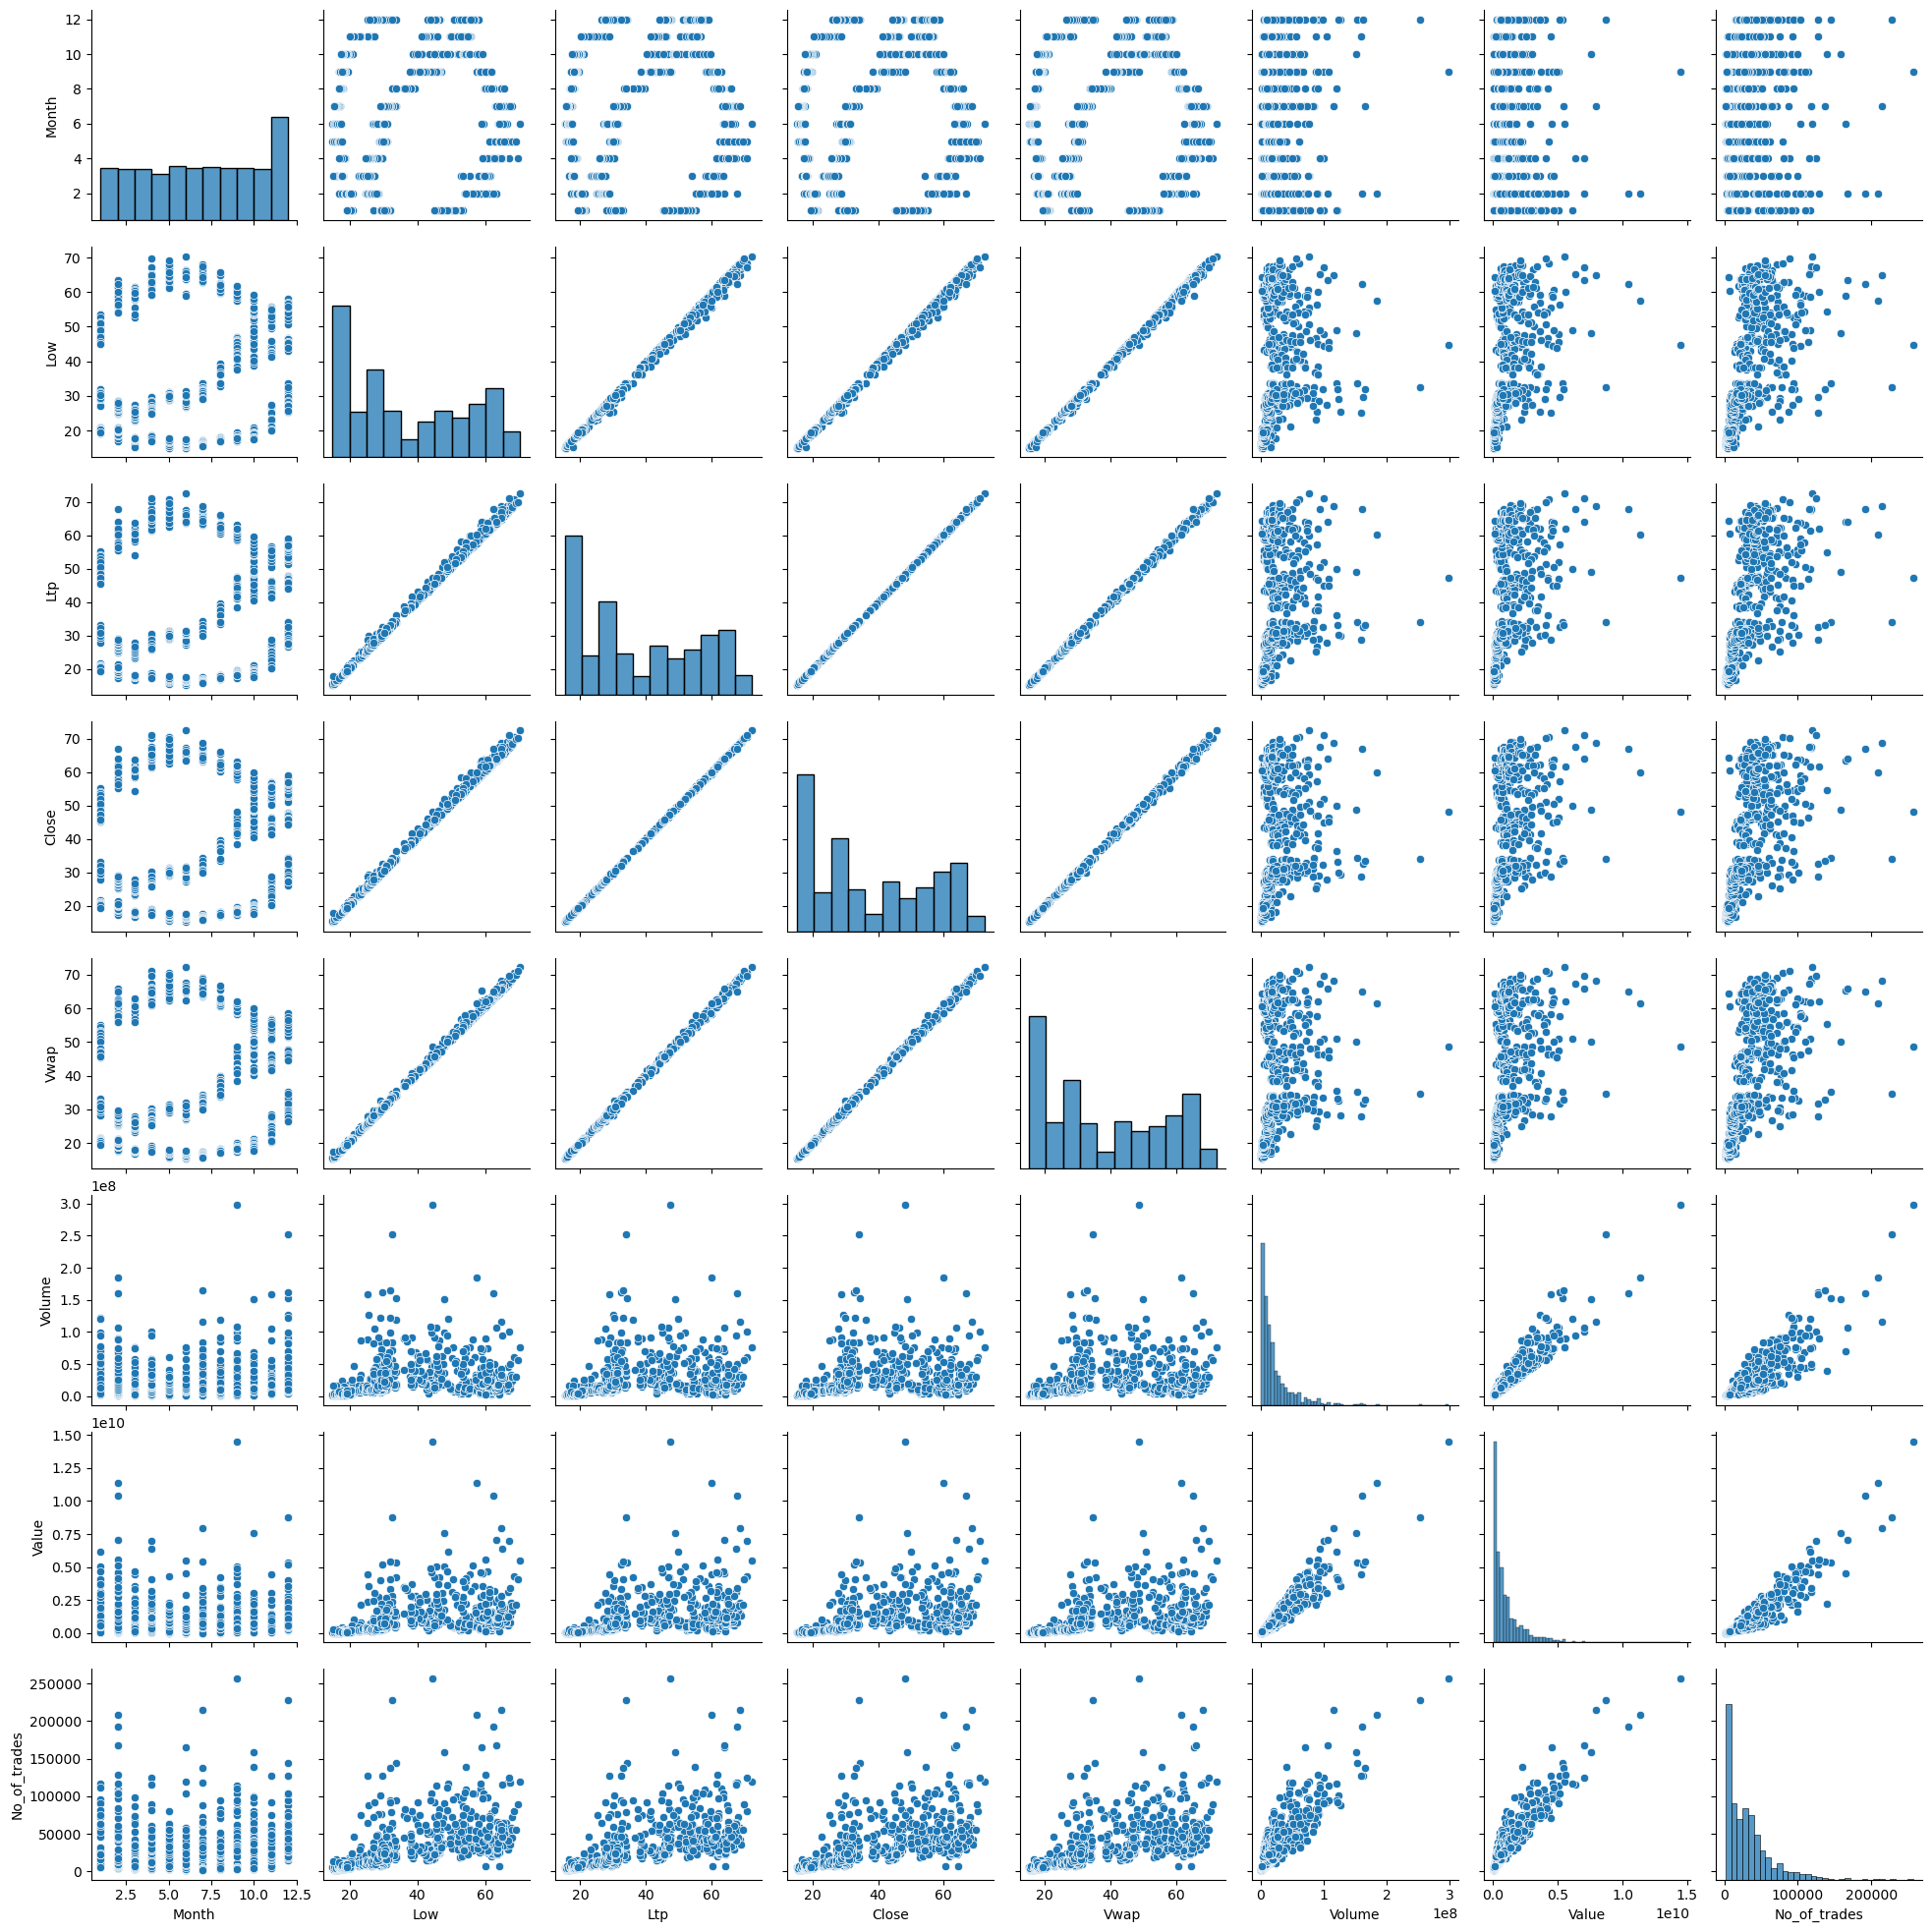

In [23]:
sns.pairplot(df,vars=['Month','Low','Ltp','Close','Vwap','Volume','Value','No_of_trades'])

Machine learning model

In [24]:
x=df[['Day','Month','DayOfWeek','Open','Low','Prev._close','Ltp','Close','Vwap','52w_h','52w_l','Volume','Value','No_of_trades']]
y=df['High']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [27]:
# df[df.values==["33,002"]]

In [28]:
y_pred= regressor.predict(x_test)
df_p = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(df.to_string())

In [29]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.13631106876748103
Mean Squared Error: 0.037370329515834404
Root Mean Squared Error: 0.19331406962721157


In [30]:
from sklearn.metrics import r2_score
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score*100,"%")

r2 socre is  99.98881430867269 %


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Series,object
Open,float64
High,float64
Low,float64
Prev._close,float64
Ltp,float64
Close,float64
Vwap,float64
52w_h,float64
